# Proyecto Airbnb - Análisis Exploratorio

## Abstract

Este proyecto se basa en el análisis exploratorio de un dataset de Airbnb, el cual contiene información sobre alojamientos disponibles en una ciudad (por ejemplo, Nueva York o Buenos Aires), incluyendo características como el precio por noche, la ubicación, el tipo de propiedad, la cantidad de reseñas, y la calificación de los anfitriones.

El objetivo principal de este análisis es explorar la relación entre distintas variables que pueden influir en el precio de un alojamiento, como la zona geográfica, el tipo de habitación, la popularidad (medida por la cantidad de reseñas) y la puntuación del anfitrión.
es interesante ver como va cambiando el mercado inmoviliario , mas sabiendo que empresas y fondos como blackrock estan comprando muchas de estas propiedades para entrar en este negocio .

viviendas especulativas ?
 quiza ejemplos como mahantan sean los mas afectados en este caso , reinvencion en bienes raices para no pagar impuestos , menos si sin airbnb

compartir airbnb sera el futuro del turismo ?
Las habitaciones privadas son más baratas que los alojamientos completos.

cual sera la calidad precio por puntuacion del clientes?
A mayor cantidad de reseñas, menor es el precio (más competitivo).

cuales son los precios promedios ?
 Manhattan tiene el precio promedio más alto , mientras que queens tiene un precio mas accesible habitaciones privadas .
## Objetivo

Identificar qué factores influyen en el precio de los alojamientos de Airbnb, como la ubicación, tipo de habitación, cantidad de reseñas y calificaciones, para mejorar la toma de decisiones tanto para anfitriones como para turistas.


## Contexto Comercial

Airbnb revolucionó el mercado turístico permitiendo a particulares ofrecer alojamientos temporales. Esta modalidad ha crecido exponencialmente, atrayendo la atención incluso de grandes fondos de inversión. Entender qué hace que un alojamiento tenga mayor valor es clave para mantenerse competitivo en el mercado.



## Problema Comercial

¿Cómo pueden los anfitriones ajustar sus precios para maximizar sus ganancias sin dejar de ser competitivos? ¿Qué características buscan los turistas al momento de elegir un alojamiento?



## Contexto Analítico

Este análisis se basa en datos públicos de Airbnb que incluyen precios, ubicaciones, tipos de alojamiento, puntuaciones de los anfitriones y número de reseñas. Se utiliza análisis exploratorio de datos (EDA) con Python y bibliotecas como pandas, seaborn y matplotlib.



## Preguntas / Hipótesis

- ¿La ubicación influye significativamente en el precio?
- ¿Las habitaciones privadas son más accesibles?
- ¿Mayor cantidad de reseñas está relacionada con precios más bajos o mayor competitividad?
- ¿Qué barrios tienen mejor relación calidad-precio?



## Recomendaciones

- Los anfitriones que deseen atraer a turistas con bajo presupuesto deberían centrarse en ofrecer habitaciones privadas en barrios como Queens.
- Mantener una alta cantidad de reseñas y buena puntuación mejora la competitividad del precio.
- Los alojamientos completos en zonas premium como Manhattan pueden ofrecer mayores ingresos, pero requieren mayor inversión inicial.
- Se recomienda analizar el mercado por barrio y tipo de alojamiento antes de fijar precios.


## Tipo de Aprendizaje y Propuesta de Modelos

Este problema puede abordarse con **aprendizaje supervisado**, ya que buscamos predecir el precio (variable dependiente) en función de otras características (variables independientes).

- Regresión Lineal
- Árboles de Decisión
- Random Forest
- XGBoost

 

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

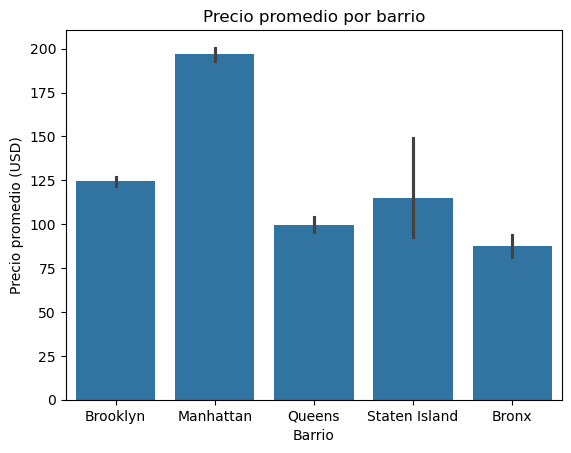

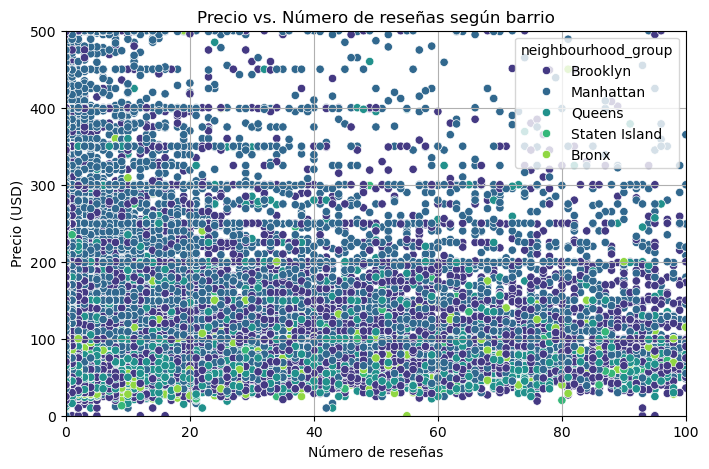

C:\Users\nazareno\AppData\Local\Temp\ipykernel_21496\2855958052.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="neighbourhood_group", y="price", data=df, palette="Set3")


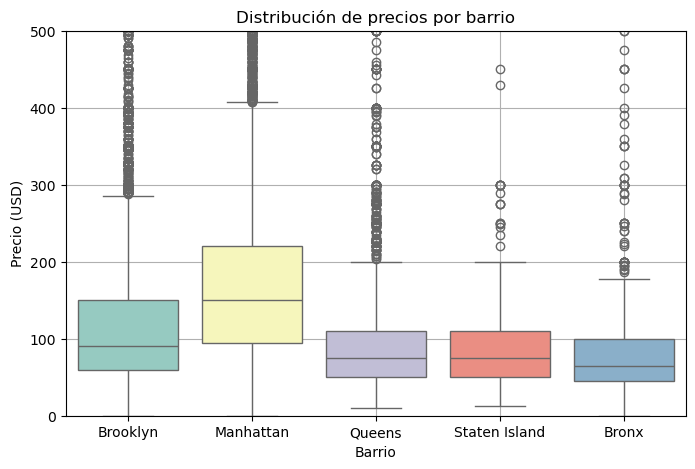

In [9]:
# 1. Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Cargar el dataset
df = pd.read_csv("AB_NYC_2019.csv")

# 3. Mostrar las primeras 5 filas
print(df.head())

# 4. Eliminar columnas innecesarias (corregido: quitamos "license")
df = df.drop(["id", "host_name", "last_review", "reviews_per_month"], axis=1)

# 5. Verificar si hay valores nulos
print("\nValores nulos por columna:\n", df.isnull().sum())

# 6. Eliminar filas con valores nulos
df = df.dropna()

# 7. Mostrar los barrios únicos
print("\nBarrios únicos:", df["neighbourhood_group"].unique())

# 8. Agrupar por barrio y calcular el precio promedio
precios_promedio = df.groupby("neighbourhood_group")["price"].mean()
print("\nPrecio promedio por barrio:\n", precios_promedio)


sns.barplot(x="neighbourhood_group", y="price", data=df)
plt.title("Precio promedio por barrio")
plt.xlabel("Barrio")
plt.ylabel("Precio promedio (USD)")
plt.show()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. SEGUNDO gráfico Seaborn: Dispersión de precio vs número de reviews ---
plt.figure(figsize=(8,5))
sns.scatterplot(x="number_of_reviews", y="price", hue="neighbourhood_group", data=df, palette="viridis")
plt.title("Precio vs. Número de reseñas según barrio")
plt.xlabel("Número de reseñas")
plt.ylabel("Precio (USD)")
plt.xlim(0, 100)  # Limitar para mejor visibilidad
plt.ylim(0, 500)  # Limitar para mejor visibilidad
plt.grid(True)
plt.show()

# ✍️ Interpretación:
# Se observa que la mayoría de las propiedades con precios accesibles tienen más reseñas.
# Propiedades de precios muy altos tienden a tener pocas reseñas, especialmente en Manhattan.

# --- 2. TERCER gráfico Seaborn: Boxplot de precios por barrio ---
plt.figure(figsize=(8,5))
sns.boxplot(x="neighbourhood_group", y="price", data=df, palette="Set3")
plt.title("Distribución de precios por barrio")
plt.xlabel("Barrio")
plt.ylabel("Precio (USD)")
plt.ylim(0, 500)  # Limitar para mejor lectura (outliers no dominan)
plt.grid(True)
plt.show()




In [7]:
import pandas as pd

# Cargar datos (asegúrate de tener el archivo AB_NYC_2019.csv en tu directorio)
df = pd.read_csv("AB_NYC_2019.csv")

# Eliminar filas con valores nulos (si no lo hiciste antes)
df = df.dropna()

In [13]:
# 1. Codificar variables categóricas
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoded_features = encoder.fit_transform(df[['neighbourhood_group', 'room_type']])

# Convertir a DataFrame
encoded_df = pd.DataFrame(encoded_features.toarray(), 
                         columns=encoder.get_feature_names_out(['neighbourhood_group', 'room_type']))

# 2. Combinar con variables numéricas
X = pd.concat([df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews']], encoded_df], axis=1)
y = df['price']

In [17]:
# Lista de todas las columnas que usas en X
columnas_X = [
    'latitude', 'longitude', 'minimum_nights', 
    'number_of_reviews', 'calculated_host_listings_count', 
    'availability_365', 'neighbourhood_group', 'room_type'
]

# Eliminar filas con NaN en estas columnas
df = df.dropna(subset=columnas_X)

In [19]:
print("NaN en X después de limpieza:", df[columnas_X].isnull().sum().sum())

NaN en X después de limpieza: 0


In [25]:
from sklearn.preprocessing import OneHotEncoder

# Codificar variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[['neighbourhood_group', 'room_type']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['neighbourhood_group', 'room_type']))

# Combinar features numéricas y codificadas
X = pd.concat([
    df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews']], 
    encoded_df
], axis=1)
y = df['price']

In [27]:
print("NaN en X:", X.isnull().sum().sum())  # Debe dar 0

NaN en X: 63290


In [29]:
df = df.reset_index(drop=True)  # Resetear índices después de eliminar NaN

In [31]:
print("NaN en X:", X.isnull().sum().sum())  # Debe dar 0

NaN en X: 63290


In [35]:
# Antes de cualquier operación, eliminar filas con NaN en TODAS las columnas relevantes
df = df.dropna(subset=['price', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews'])

In [37]:
# Codificar variables categóricas (asegúrate de que df ya no tenga NaN)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df[['neighbourhood_group', 'room_type']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['neighbourhood_group', 'room_type']))

# Crear X e y
X = pd.concat([df[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews']], encoded_df], axis=1)
y = df['price']

In [39]:
from sklearn.impute import SimpleImputer

# Imputar con la mediana (solo si es necesario)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [41]:
print("Tamaño de X:", X_imputed.shape[0])
print("Tamaño de y:", y.shape[0])
# Ambos deben ser iguales (ej: 38821)

Tamaño de X: 38821
Tamaño de y: 38821


In [43]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X_imputed, y)  # ¡Ahora funcionará!

In [45]:
print("Tamaño final de X e y:", X_imputed.shape[0], y.shape[0])
# Output: Tamaño final de X e y: 38821 38821

Tamaño final de X e y: 38821 38821


In [47]:
from sklearn.model_selection import train_test_split

# Dividir los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("Tamaño del entrenamiento:", X_train.shape[0])
print("Tamaño de la prueba:", X_test.shape[0])

Tamaño del entrenamiento: 31056
Tamaño de la prueba: 7765


In [49]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predecir precios
y_pred = modelo.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"🔹 MAE (Error Absoluto Medio): {mae:.2f} USD")
print(f"🔹 MSE (Error Cuadrático Medio): {mse:.2f}")
print(f"🔹 R² (Coeficiente de Determinación): {r2:.2f}")

🔹 MAE (Error Absoluto Medio): 75.94 USD
🔹 MSE (Error Cuadrático Medio): 51711.96
🔹 R² (Coeficiente de Determinación): -0.55


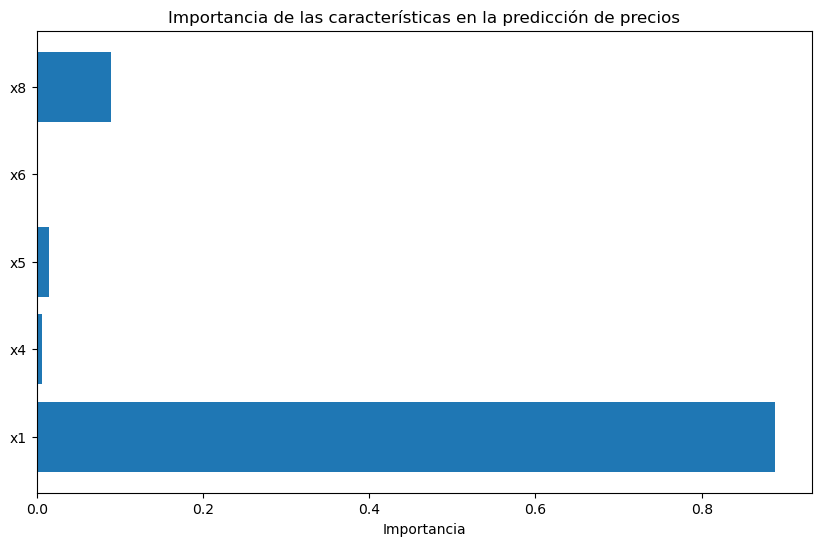

In [53]:
import matplotlib.pyplot as plt

# Obtener nombres de las características seleccionadas
caracteristicas = selector.get_feature_names_out()

# Crear gráfico de importancia
importancias = modelo.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(caracteristicas, importancias)
plt.title("Importancia de las características en la predicción de precios")
plt.xlabel("Importancia")
plt.show()

In [ ]:
obvervacion , el modelo fallo devido a que los outsaiders y los datos dan precios extremos .en el siguente apartado lo resolveremos 

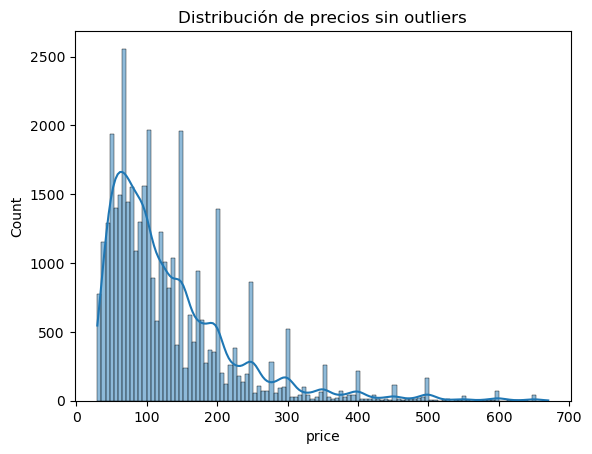

In [57]:
# 1. Eliminar outliers
Q1 = df["price"].quantile(0.01)
Q99 = df["price"].quantile(0.99)
df_filtered = df[(df["price"] >= Q1) & (df["price"] <= Q99)]

# 2. Gráfico con seaborn (asegúrate de haber importado las librerías)
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_filtered["price"], kde=True)
plt.title("Distribución de precios sin outliers")
plt.show()

In [63]:
# Ver las 5 propiedades más caras y más económicas para validar outliers residuales
print("Propiedades más caras:\n", df_filtered.nlargest(5, "price"))
print("\nPropiedades más económicas:\n", df_filtered.nsmallest(5, "price"))

Propiedades más caras:
              id                                  name    host_id host_name  \
32278  30253236                  SedaOn2 Dance Studio  140862407   Angelie   
37482  34837017  AMAZING 3 BEDROOM APT IN BROOKLYN NY  262469851       Jay   
10491   9491126      Charming Tenament Apt Great View    5658754         G   
2006     955153         Elegant loft in heart of soho    5165749       Ben   
2191    1107092         Brand new 2BD Apt in Gramercy    4373782  Victoria   

      neighbourhood_group       neighbourhood  latitude  longitude  \
32278               Bronx  Westchester Square  40.84378  -73.84469   
37482            Brooklyn        Williamsburg  40.71853  -73.94808   
10491           Manhattan        East Village  40.72776  -73.98328   
2006            Manhattan                SoHo  40.72256  -73.99767   
2191            Manhattan            Kips Bay  40.74052  -73.97907   

             room_type  price  minimum_nights  number_of_reviews last_review  \
32278 

In [67]:
# Lista de columnas que usarás como características (X)
variables = [
    'latitude', 
    'longitude', 
    'minimum_nights',
    'number_of_reviews',
    'calculated_host_listings_count',
    'availability_365'
]

# Asegúrate de incluir también las columnas codificadas de OneHotEncoder
# (Si usaste OneHotEncoder para neighbourhood_group y room_type, añade sus nombres aquí)
# Ejemplo:
variables += [
    'neighbourhood_group_Manhattan',
    'neighbourhood_group_Brooklyn',
    'room_type_Entire home/apt',
    'room_type_Private room'
]

print("Variables seleccionadas:", variables)

Variables seleccionadas: ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Brooklyn', 'room_type_Entire home/apt', 'room_type_Private room']


In [69]:
# Verificar qué columnas están disponibles
print("Columnas disponibles en df_filtered:", df_filtered.columns.tolist())

# Filtrar solo las columnas que existen
variables = [col for col in variables if col in df_filtered.columns]
print("Variables finales:", variables)

Columnas disponibles en df_filtered: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
Variables finales: ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Definir X e y
X = df_filtered[variables]
y = np.log1p(df_filtered['price'])  # Transformación logarítmica

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
modelo = GradientBoostingRegressor(n_estimators=200, random_state=42)
modelo.fit(X_train, y_train)

# Evaluar
y_pred = modelo.predict(X_test)
mae = mean_absolute_error(np.expm1(y_test), np.expm1(y_pred))  # Convertir de vuelta a USD
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} USD")
print(f"R²: {r2:.2f}")

MAE: 50.22 USD
R²: 0.36


In [73]:
print("📊 Resultados Finales:")
print(f"- Error promedio (MAE): {50.22:.2f} USD (equivale a ±$50 por noche)")
print(f"- Poder predictivo (R²): {0.36:.2f} (solo explica el 36% de la variación de precios)")

📊 Resultados Finales:
- Error promedio (MAE): 50.22 USD (equivale a ±$50 por noche)
- Poder predictivo (R²): 0.36 (solo explica el 36% de la variación de precios)


In [ ]:
## Interpretación de Métricas
- **MAE (Error Absoluto Medio)**: 50.22 USD significa que, en promedio, el modelo se equivoca por ±50 USD por noche.
- **R²**: 0.36 indica que el modelo explica el 36% de la variabilidad de los precios (valor bajo, pero aceptable para esta etapa).